# Biblioteka Seaborn

Seaborn to biblioteka wykorzystywana do statystycznych wizualizacji danych. Została zbudowana na bazie biblioteki matplotlib i jednocześnie została zintegrowana do struktur danych udostępnianych przez bibliotekę pandas. 

In [1]:
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.genfromtxt('athlete_events_np.csv',
                     delimiter=';',
                     dtype=[
                         ('ID', 'i4'),
                         ('Name', 'U100'),
                         ('Sex', 'U1'),
                         ('Age', 'f4'),
                         ('Height', 'f4'),
                         ('Weight', 'f4'),
                         ('Team', 'U100'),
                         ('NOC', 'U3'),
                         ('Games', 'U100'),
                         ('Year', 'i4'),
                         ('Season', 'U100'),
                         ('City', 'U100'),
                         ('Sport', 'U100'),
                         ('Event', 'U100'),
                         ('Medal', 'U100')
                     ], names=True)
df = pd.DataFrame(data)

--------------------
### Wykresy relacyjne

Wykresy relacyjne przedstawiają relacje pomiędzy danymi. Funkcja `relplot` znajduje się na poziomie *figure* (poziom wyższy) i korzysta z funkcji z poziomu *axes* (poziom niższy): `scatterplot` oraz `lineplot`. Do wizualizacji danych można wykorzystywać wszystkie powyższe funkcje z odpowiednimi parametrami.

##### ⭐ Zadanie 1: 

Przygotuj wykres punktowy (`scatterplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Zapoznaj się z funkcjami `set_theme` i `set_style` oraz ich parametrami. Wykorzystaj je, żeby dostosować wygląd swojego wykresu. Zadbaj o czytelność wykresu (tytuł wykresu i podpisy osi). 

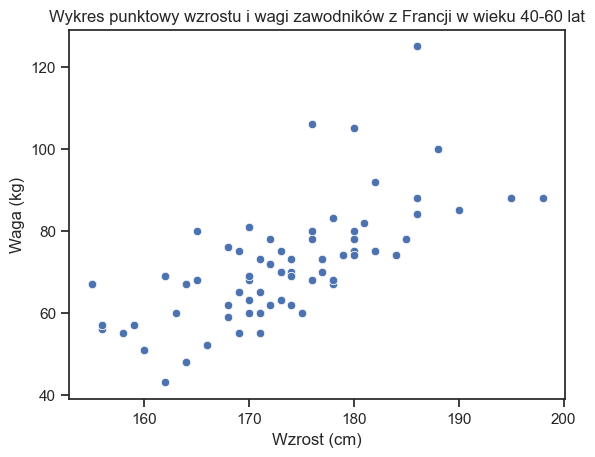

In [19]:
height_weight_data_france = df[df['Team'] == 'France'][['Height', 'Weight', 'Age']].dropna() # Filtruj dane dla zawodników z Francji, wybierz kolumny Height i Weight, usuń wiersze z brakującymi danymi

height_weight_data_france_filtered = height_weight_data_france[(height_weight_data_france['Age'] >= 40) & (height_weight_data_france['Age'] <= 60)] # Ograniczenie do zawodników w wieku 40-60 lat

sns.scatterplot(x='Height', y='Weight', data=height_weight_data_france_filtered)
sns.set_style("whitegrid") # Ustawienie stylu wykresu, inna opcja to "darkgrid"
sns.set_theme(style="ticks") # Ustawienie motywu wykresu, inna opcja to "dark"

plt.title('Wykres punktowy wzrostu i wagi zawodników z Francji w wieku 40-60 lat')
plt.xlabel('Wzrost (cm)')
plt.ylabel('Waga (kg)')

plt.show()

##### ⭐ Zadanie 2:

Przygotuj wykres liniowy (`lineplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 serie danych. Zapoznaj się z parametrem `hue` oraz dobierz dla niego właściwą wartość mając na uwadze wizualizację określonej liczby serii danych. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi i legenda). 

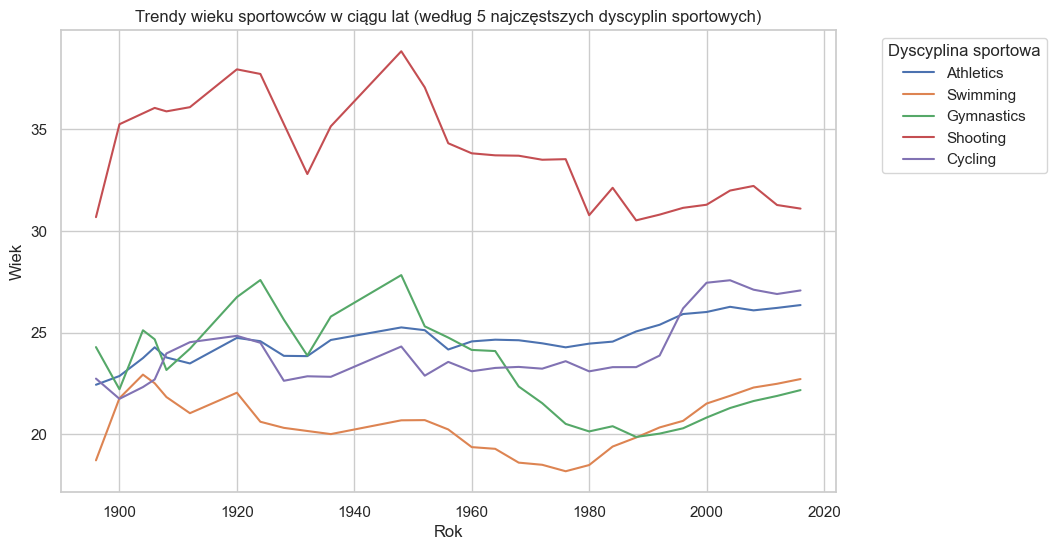

In [4]:
top_sports = df['Sport'].value_counts().index[:5] # Wybór 5 najczęściej występujących dyscyplin sportowych
df_filtered = df[df['Sport'].isin(top_sports)] # Filtrowanie danych do 5 najczęściej występujących dyscyplin sportowych

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) # Ustawienie wielkości wykresu

sns.lineplot(data=df_filtered, x='Year', y='Age', hue='Sport', errorbar=None)  # Podział na dyscypliny sportowe, hue - odpowiada za podział na serie danych, errorbar=None - wyłączenie słupków błędu(inna opcja to "sd")

plt.title('Trendy wieku sportowców w ciągu lat (według 5 najczęstszych dyscyplin sportowych)')
plt.xlabel('Rok')
plt.ylabel('Wiek')
plt.legend(title='Dyscyplina sportowa', bbox_to_anchor=(1.05, 1), loc='upper left') # Przesunięcie legendy obok wykresu

plt.show()

##### ⭐ Zadanie 3:

Przygotuj wykres liniowy (`relplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 serie danych, gdzie każda seria danych będzie przedstawiona na osobnym podwykresie (`subplot`) jednego obrazu. Zapoznaj się z parametrami `row` i `col` oraz dobierz dla nich właściwą wartość mając na uwadze wizualizację określonej liczby serii danych na osobnych podwykresach. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi i ewentualnie legenda). 

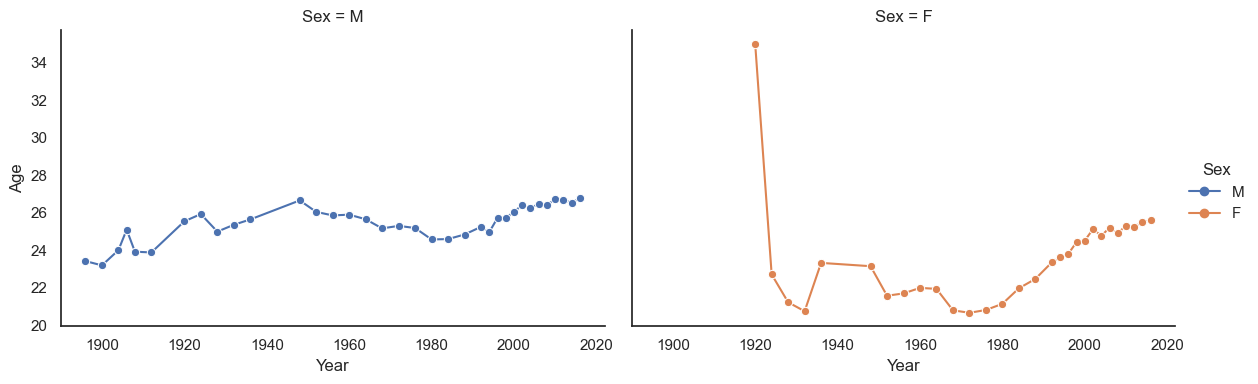

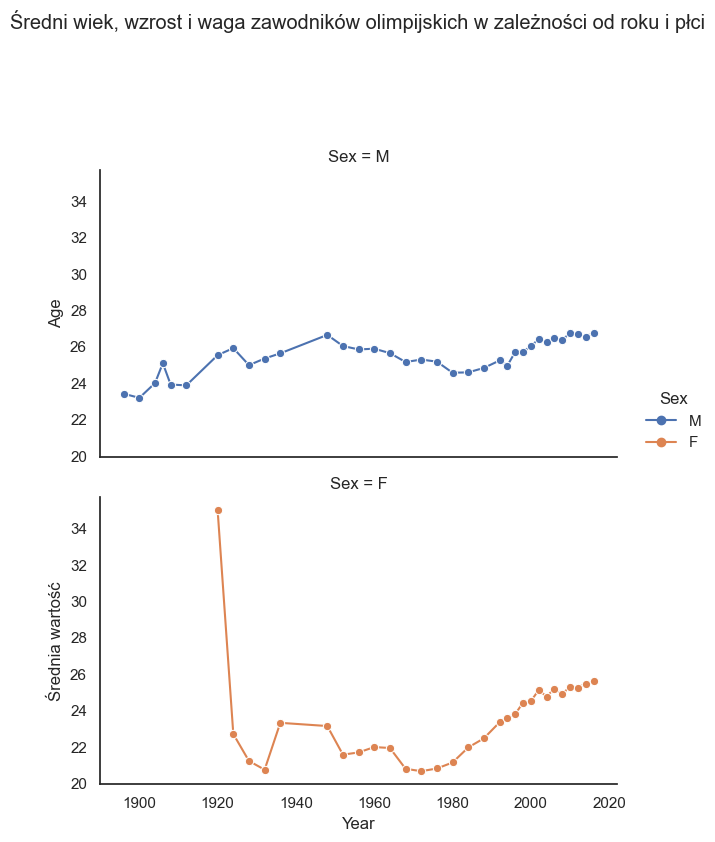

In [28]:
selected_data = df[['Year', 'Sex', 'Age', 'Height', 'Weight']].dropna()

grouped_data = selected_data.groupby(['Year', 'Sex']).mean().reset_index() # Grupowanie danych według roku i płci oraz obliczenie średnich wartości dla każdej grupy (wiek, wzrost, waga) reset_index() - zresetowanie indeksu

sns.relplot(data=grouped_data, x='Year', y='Age', kind='line', hue='Sex', col='Sex', aspect=1.5, height=4, marker='o') # kind - rodzaj wykresu (line - wykres liniowy), hue - grupowanie punktów na wykresie według płci, col - podział na serie danych według płci, aspect - proporcje wykresu, height - wysokość wykresu, marker - symbol punktów na wykresie

sns.relplot(data=grouped_data, x='Year', y='Age', kind='line', hue='Sex', row='Sex', aspect=1.5, height=4, marker='o') # kind - rodzaj wykresu (line - wykres liniowy), hue - grupowanie punktów na wykresie według płci, row - podział na serie danych według płci, aspect - proporcje wykresu, height - wysokość wykresu, marker - symbol punktów na wykresie

plt.suptitle('Średni wiek, wzrost i waga zawodników olimpijskich w zależności od roku i płci', y=1.05)
plt.subplots_adjust(top=0.85)
plt.xlabel('Year')
plt.ylabel('Średnia wartość')
plt.show()

##### ⭐ Zadanie 4:

Przygotuj wykres bąbelkowy (`relplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Wykorzystaj rozmiary i kolory markerów do zaprezentowania większej liczby informacji. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi i opis skali koloru). 

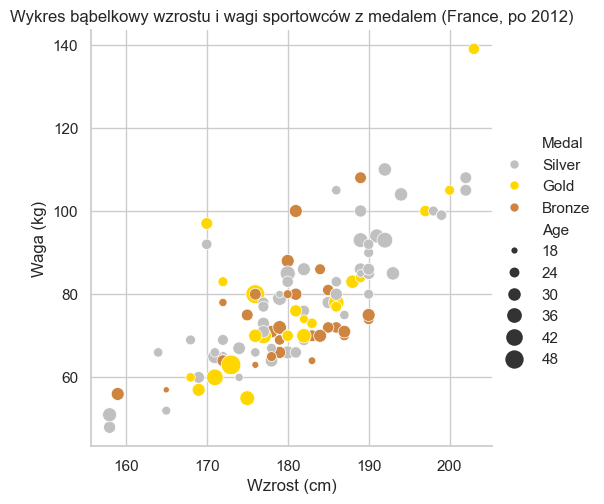

In [11]:
df_Medal = df.copy()
df_Medal = df_Medal[df_Medal['Medal'] != 'NA'] # Usuń wiersze z wartościami "NA" w kolumnie Medal
df_Medal = df_Medal.dropna(subset=['Height', 'Weight', 'Age']) # Usuń wiersze, w których brakuje danych dotyczących wzrostu, wagi lub wieku
df_france = df_Medal[df_Medal['Team'] == 'France'] # Ograniczenie tylko do rekordów z France
df_france_post_2012 = df_france[df_france['Year'] > 2012] # Ograniczenie wyników do po 2012 roku

# Wykres bąbelkowy
sns.relplot(x='Height', y='Weight', size='Age', hue='Medal', palette={'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'peru'}, sizes=(20, 200), data=df_france_post_2012) # size - rozmiar punktów na wykresie bedzie proporcjonalny do wieku, hue - grupowanie punktów na wykresie według medalu, palette - ustawienie kolorów dla poszczególnych medali, sizes - zakres rozmiarów punktów na wykresie

plt.title('Wykres bąbelkowy wzrostu i wagi sportowców z medalem (France, po 2012)')
plt.xlabel('Wzrost (cm)')
plt.ylabel('Waga (kg)')

plt.show()

--------------------
### Wykresy dystrybucji

Wykresy dystrybucji przedstawiają w jawny sposób rozkład danych. Funkcja `displot` znajduje się na poziomie *figure* (poziom wyższy) i korzysta z funkcji z poziomu *axes* (poziom niższy): `histplot`, `kdeplot`, `ecdfplot` oraz `rugplot`. Do wizualizacji danych można wykorzystywać wszystkie powyższe funkcje z odpowiednimi parametrami.

##### ⭐ Zadanie 5:

Przygotuj histogram (`displot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Zapoznaj się z parametrami `bins` i `binwidth` oraz dobierz dla nich takie wartości, które wg. Ciebie najlepiej wizualizują dane. Zadbaj o czytelność wykresu (tytuł wykresu oraz podpisy osi). 

<Figure size 1000x600 with 0 Axes>

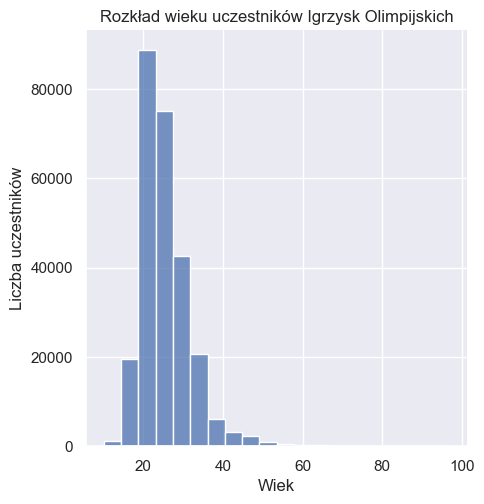

In [20]:
age_range = df['Age'].max() - df['Age'].min() # Obliczenie szerokości przedziału wieku
binwidth = age_range / 20  # Dzielę zakres wieku na 20 przedziałów

num_bins = int(age_range / binwidth) + 1 # Obliczenie liczby przedziałów na podstawie podanej szerokości przedziału 

plt.figure(figsize=(10, 6)) # Ustawienie wielkości wykresu
sns.displot(df['Age'], bins=num_bins, binwidth=binwidth) # bins - liczba przedziałów, binwidth - szerokość przedziału

plt.title('Rozkład wieku uczestników Igrzysk Olimpijskich')
plt.xlabel('Wiek')
plt.ylabel('Liczba uczestników')
plt.grid(True) # Dodanie siatki na wykresie

plt.show()

##### ⭐ Zadanie 6:

Przedstaw na wykresie dystrybucji (`displot`) jądrowy estymator gęstości (`kde`) oraz dystrybuantę empiryczną (`ecdf`) dla danych, które wg. Ciebie najlepiej pokażą ich zastosowanie. Każdy rodzaj wykresu dystrybucji musi być przedstawiony na osobnym podwykresie (`subplot`) jednego obrazu. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi i ewentualnie legenda). 

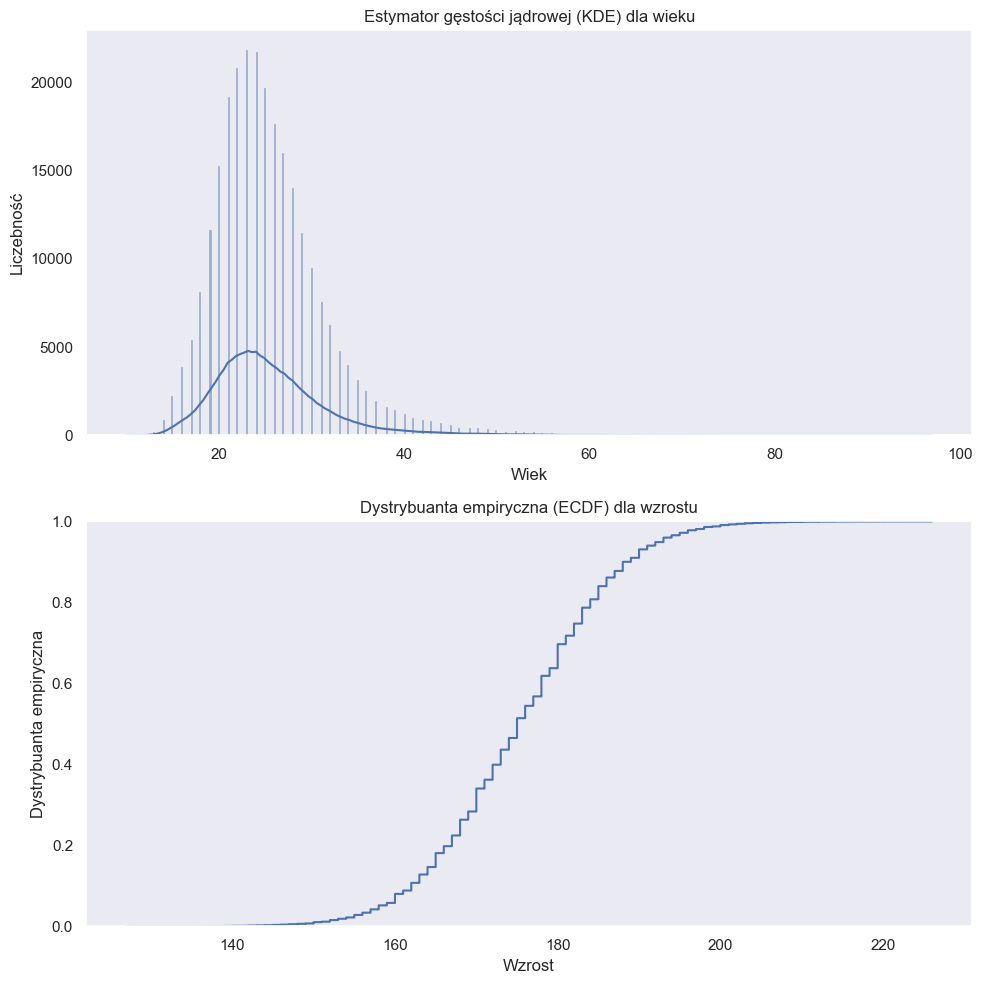

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10)) # Tworzenie dwóch subplotów (2 wiersze, 1 kolumna) o wielkości 10x10

# Wykres KDE dla wieku
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0]) # kde - wyświetlenie estymatora gęstości jądrowej
axes[0].set_title('Estymator gęstości jądrowej (KDE) dla wieku')
axes[0].set_xlabel('Wiek')
axes[0].set_ylabel('Liczebność')

# Wykres ECDF dla wzrostu
sns.ecdfplot(df['Height'].dropna(), ax=axes[1]) # ecdfplot - wyświetlenie dystrybuanty empirycznej (ECDF) 
axes[1].set_title('Dystrybuanta empiryczna (ECDF) dla wzrostu')
axes[1].set_xlabel('Wzrost')
axes[1].set_ylabel('Dystrybuanta empiryczna')

plt.tight_layout()
plt.show()

##### ⭐ Zadanie 7:

Przygotuj dwuwymiarowy histogram (`displot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi oraz legenda). 

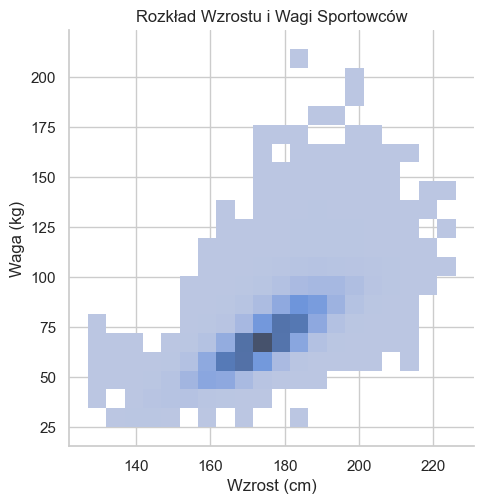

In [9]:
df_displot = df.copy()
df_displot = df_displot.dropna(subset=['Height', 'Weight']) # Usuń wiersze, w których brakuje danych dotyczących wzrostu lub wagi

sns.displot(data=df_displot, x="Height", y="Weight", kind="hist", bins=20) # kind - wybór rodzaju wykresu (hist - histogram), bins - liczba przedziałów, na które zostanie podzielony wykres

plt.title('Rozkład Wzrostu i Wagi Sportowców')
plt.xlabel('Wzrost (cm)')
plt.ylabel('Waga (kg)')

plt.show()

--------------------
### Wykresy dystrybucji +

Podstawowe typy wykresów dystrybucji mogą być dodatkowo rozszerzone o więcej informacji. Wizualizacja zależności 2 zmiennych może przedstawiać na marginesach wizualizacje rozkładu każdej zmiennej osobno. Przy wybraniu większej liczby zmiennych, możliwe jest wygenerowanie wszystkich kombinacji pomiędzy nimi. Służą do tego funkcje `jointplot` i `pairplot`, które znajdują się na poziomie *figure*.

##### ⭐ Zadanie 8:

Przygotuj wykres punktowy z rozkładem gęstości na osiach marginalnych (`jointplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 serie danych. Zapoznaj się z obiektem `plot_joint` i narysuj dodatkowo rozkład gęstości wartości na głównym wykresie punktowym. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi oraz legenda). 

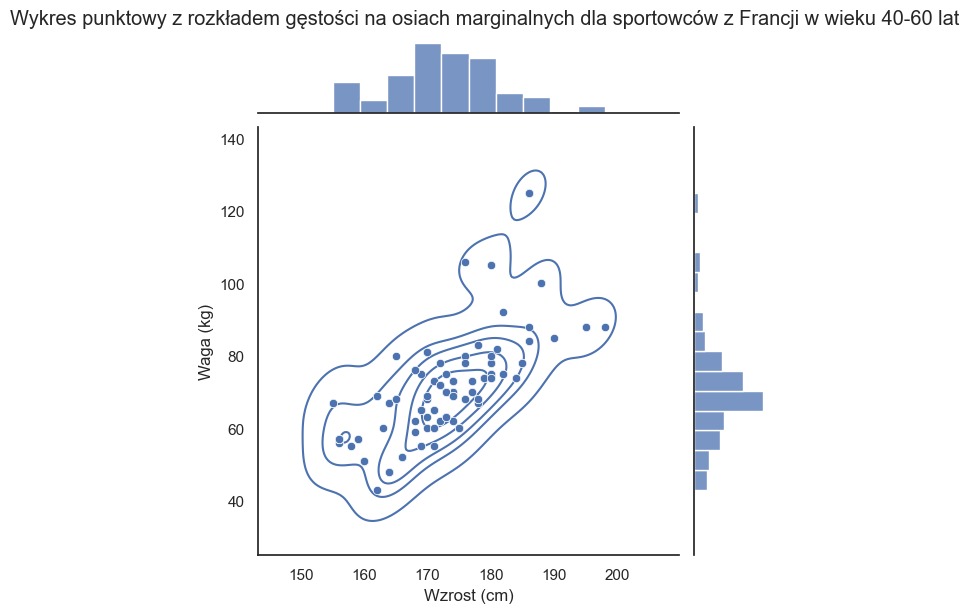

In [13]:
df_subset = df.copy()
df_france = df_subset[df_subset['Team'] == 'France'][['Age', 'Height', 'Weight']].dropna()
df_france = df_france[(df_france['Age'] >= 40) & (df_france['Age'] <= 60)] # Ograniczenie do zawodników w wieku 40-60 lat

sns.set(style="white", color_codes=True) # Ustawienie stylu wykresu
g = sns.jointplot(x="Height", y="Weight", data=df_france, kind="scatter") # jointplot - wykres punktowy, kind - rodzaj wykresu (scatter - wykres punktowy)

g.plot_joint(sns.kdeplot, zorder=0, levels=6) # plot_joint - wyświetlenie rozkładu gęstości wartości na głównym wykresie punktowym, zorder - ustawienie kolejności wyświetlania wykresów, levels - liczba poziomów konturów, kdeplot - wykres gęstości wartości

# Ustawienie tytułu na samej górze
plt.suptitle('Wykres punktowy z rozkładem gęstości na osiach marginalnych dla sportowców z Francji w wieku 40-60 lat', y=1.02)

# Ustawienie podpisów osi
g.set_axis_labels("Wzrost (cm)", "Waga (kg)")

# Wyświetlenie wykresu
plt.show()

##### ⭐ Zadanie 9:

Przygotuj wykres punktowy (`pairplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 serie danych. Zapoznaj się z parametrem `markers` i dobierz dla każdej serii danych inny symbol. Zapoznaj się z parametrem `diag_kind` i ustaw histogram dla wszystkich wykresów na przekątnej. Zadbaj o czytelność wykresu (tytuł wykresu, podpisy osi oraz legenda). 

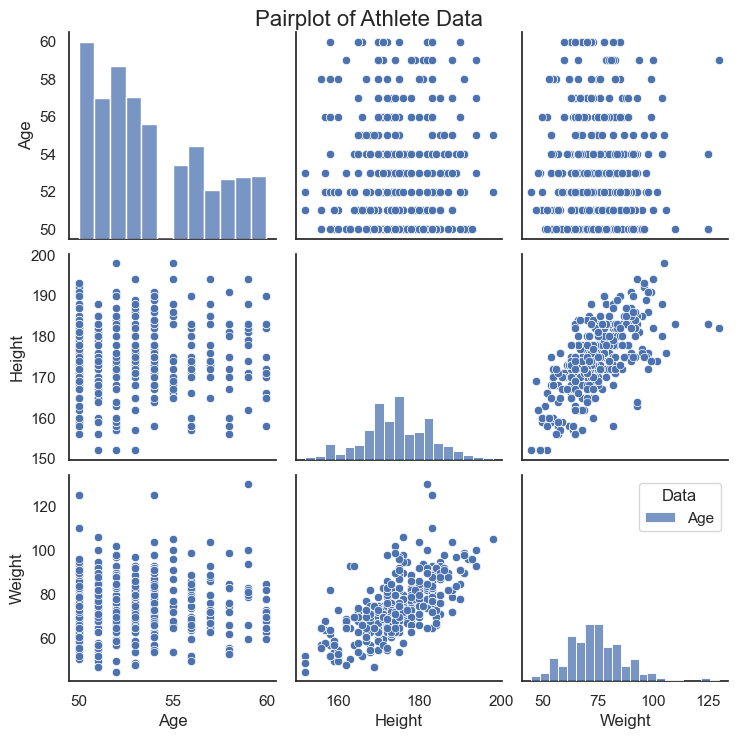

In [17]:
selected_data = df[['Age', 'Height', 'Weight']]
selected_data = selected_data[(selected_data['Age'] >= 50) & (selected_data['Age'] <= 60)]

markers = ['o', 's', '^'] # Ustawienie różnych symboli dla poszczególnych serii danych (Age, Height, Weight)

sns.pairplot(selected_data, markers=markers, diag_kind='hist') # Stworzenie wykresu pairplot z użyciem wybranych danych, markers - ustawienie symboli dla poszczególnych serii danych, diag_kind - rodzaj wykresu na przekątnej (hist - histogram)

plt.suptitle('Pairplot of Athlete Data', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Height', fontsize=12)
plt.legend(title='Data', labels=['Age', 'Height', 'Weight'])

plt.show()

--------------------
### Wykresy kategorialne

Wykresy kategorialne przedstawiają dane podzielone na kategorie. Funkcja `catplot` znajduje się na poziomie *figure* (poziom wyższy) i korzysta z funkcji z poziomu *axes* (poziom niższy): `stripplot`, `swarmplot`, `boxplot`, `violinplot`, `pointplot` oraz `barplot`. Do wizualizacji danych można wykorzystywać wszystkie powyższe funkcje z odpowiednimi parametrami.

##### ⭐ Zadanie 10: 

Przygotuj wykres punktowy (`catplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 kategorie i co najmniej 2 serie danych. Zapoznaj się z dwiema metodami rysowania wykresów punktowych kategorialnych (`strip`, `swarm`) i zdecyduj, która będzie lepsza w twoim rozwiązaniu. Zapoznaj się z parametrem `order` i dobierz dla niego takie wartości, żeby na osi X etykiety były pokazane w kolejności innej niż domyślna. Zadbaj o czytelność wykresu (tytuł wykresu i podpisy osi). 

C:\Users\Damian\Desktop\Personal\studia\Data\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Damian\Desktop\Personal\studia\Data\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 66.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Damian\Desktop\Personal\studia\Data\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 46.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Damian\Desktop\Personal\studia\Data\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


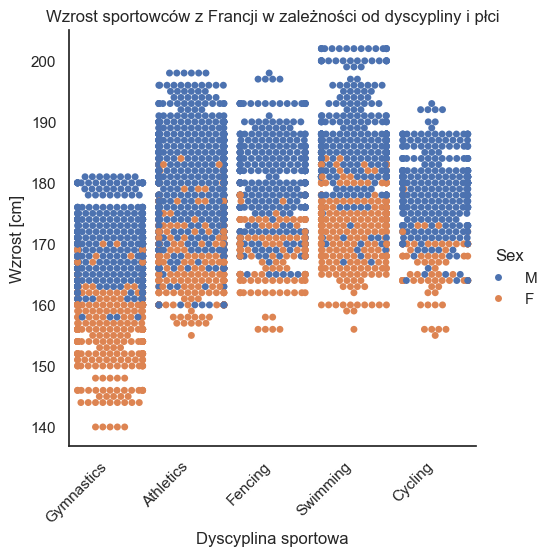

In [33]:
# Wybierz rekordy tylko dla Francji
df_fr = df[df['Team'] == 'France']

# Wybierz rekordy, w których sportowiec zdobył medal
df_with_medals = df_fr.dropna(subset=['Medal'])

# Ustawienie kolejności etykiet na osi X
order = df_with_medals['Sport'].value_counts().index

# Oblicz ilość wystąpień każdej dyscypliny sportowej
sport_counts = df_with_medals['Sport'].value_counts()

# Wybierz pięć najpopularniejszych sportów
top_5_sports = sport_counts.head(5).index

# Wygenerowanie wykresu punktowego dla pięciu najpopularniejszych sportów
sns.catplot(x='Sport', y='Height', hue='Sex', data=df_with_medals[df_with_medals['Sport'].isin(top_5_sports)], kind='swarm', order=top_5_sports)
plt.title('Wzrost sportowców z Francji w zależności od dyscypliny i płci')
plt.xlabel('Dyscyplina sportowa')
plt.ylabel('Wzrost [cm]')
plt.xticks(rotation=45, ha='right')  # Obrót etykiet na osi X dla czytelności
plt.show()

##### ⭐ Zadanie 11:

Przygotuj wykres pudełkowy (`catplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 kategorie oraz co najmniej 2 serie danych. Zapoznaj się z dwiema metodami rysowania wykresów pudełkowych kategorialnych (`box`, `boxen`) i zdecyduj, która będzie lepsza w twoim rozwiązaniu. Zadbaj o czytelność wykresu (tytuł wykresu i podpisy osi). 

In [ ]:
# tutaj wpisz swoje rozwiązanie

##### ⭐ Zadanie 12:

Przygotuj wykres kolumnowy (`catplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 kategorie oraz co najmniej 2 serie danych. Zapoznaj się z parametrem `palette` i dobierz dla niego nową wartość. Zadbaj o czytelność wykresu (tytuł wykresu i podpisy osi). 

In [ ]:
# tutaj wpisz swoje rozwiązanie

##### ⭐ Zadanie 13:

Przygotuj wykres kolumnowy (`catplot`) opierając się na danych, które sam wybierzesz w sensowny sposób. Uwzględnij co najmniej 3 kategorie oraz co najmniej 2 serie danych. Porównaj ze sobą cztery rodzaje słupków błędu: błąd standardowy (`se` - standard error), odchylenie standardowe (`sd` - standard deviation), przedział centylowy (`pi` - percentile interval) i przedział ufności (`ci` - confidence interval). Każdy rodzaj słupków błędu musi być przedstawiony na osobnym podwykresie (`subplot`) jednego obrazu. Zadbaj o czytelność wykresu (tytuł wykresu i podpisy osi). 

In [ ]:
# tutaj wpisz swoje rozwiązanie